# 21M.387 Fundamentals of Music Processing
## Lab5

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *
import fmp

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 3)

## Exercise 1

For the matrix `m` below, create two vectors:
- the average values along the columns
- the average values along the rows

In [19]:
m = np.array(((8, 2, 7, 7), (6., 3, 5, 8), (1, 4, 9, 6)))
print m

col_ave = np.sum(m,0)/m.shape[0]
row_ave = np.sum(m,1)/m.shape[1]

print col_ave.reshape(1,-1)
print row_ave.reshape(-1,1)


[[ 8.  2.  7.  7.]
 [ 6.  3.  5.  8.]
 [ 1.  4.  9.  6.]]
[[ 5.  3.  7.  7.]]
[[ 6. ]
 [ 5.5]
 [ 5. ]]


## Exercise 2
In the following exercise, we will explore the auto-correlation tempogram using this piece of audio:

In [9]:
snd = load_wav("audio/queen_another_one.wav", 0, 30)
fs = 22050.
ipd.Audio(snd, rate = fs)

Generate $\Delta(n)$, the spectral novelty function of `snd` using:  
`fmp.spectral_novelty(x, win_len, hop_size, gamma)`

Use the parameters:
- $N=1024$ 
- $H=512$ 
- $\gamma=100$

Plot $\Delta(n)$

[ 0.00414068  0.          0.00014306 ...,  0.00376289  0.04166144  0.        ]


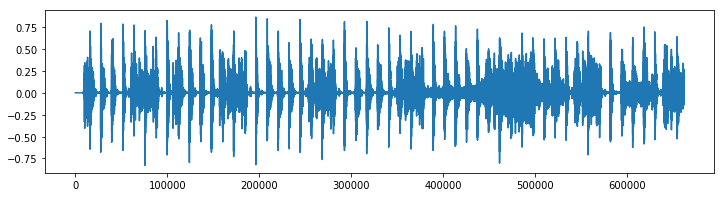

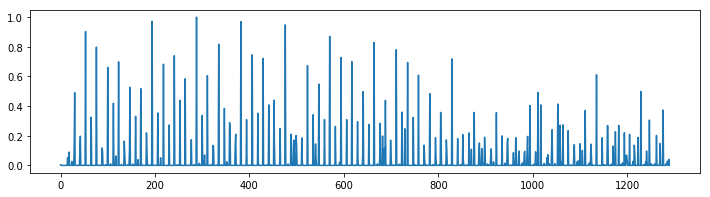

In [10]:
# answer
win_len, hop_size, gamma = 1024, 512, 100
delta = fmp.spectral_novelty(snd, win_len, hop_size, gamma)
print delta

plt.figure()
plt.plot(snd)
plt.figure()
plt.plot(delta)

Now grab a small window of $\Delta(n)$ starting at $n=100$, with window length $L=256$. We'll call this signal $w(n)$.

Plot $w(n)$.

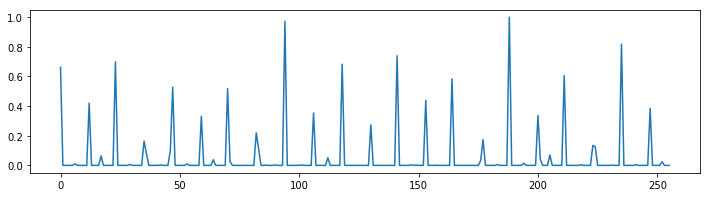

In [11]:
# answer
n, L = 100, 256
w = delta[n:n+L]

plt.figure()
plt.plot(w)

Create a function to compute the auto-correlation of a signal $x(n)$:
$$ R_{xx}(l) = \sum_{n=0}^{n=L-1} x(n) \cdot x(n-l) $$

You should assume that $x(n)$ is zero outside the window bounds $n \in [0,L-1]$.

Use a python `for` loop, where you loop over each lag value (from 0 to L-1), computing $ R_{xx}(l)$ using the dot product.

- Find $R_{xx}$ for the windowed signal $w(n)$
- Plot the result

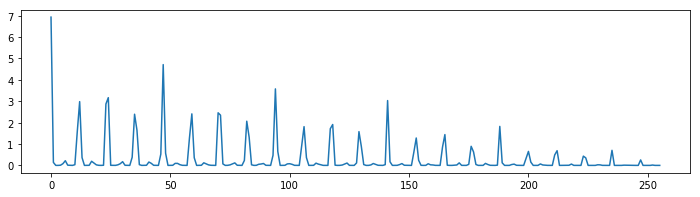

In [12]:
# answer
def auto_correlate(x) :
    dim = len(x)
    z = np.zeros(dim)
    pad_x = np.concatenate([x,z]).reshape(-1,1)
    pad_x_to_auto = np.vstack([np.concatenate([np.zeros(y),x,np.zeros(dim-y)]) for y in range(dim)])
    return np.dot(pad_x_to_auto,pad_x)
#return vector of length of l
#l[0] is dot product with shifted by zero

plt.figure()
plt.plot(auto_correlate(w))

## Exercise 3
Create the same auto-correlation vector, but use the numpy function `np.correlate` to achieve the same result without using a `for` loop. Hint, use the optional argument `mode='full'`.

Plot this to show that both methods produce the same result.

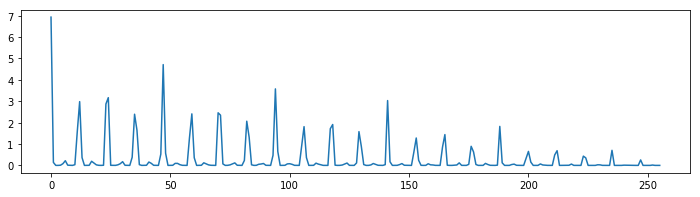

In [16]:
plt.figure()
cor1 = auto_correlate(w)
cor2 = np.correlate(w,w,mode='full')[len(w)-1:]

assert(np.sum(cor1) == np.sum(cor2))
plt.figure()
plt.plot(cor2)


## Exercise 4

Given the parameters above
- What lag values ($l$) correspond to the first 4 big peak of the AC function (not including $l=0$)? [Hint: you can use `find_peaks`]
- What tempo (BPM) values do these peaks correspond to?

In [17]:
def index_to_tempo(i):
    #peak at i means that self-similar when shifted by i
    #so different peak i's will correspond to different mults of the beat
    #if the song is i-periodic (i hops/period) * (1 period / 1 beat) * Ff samples/hop * 1/Fs seconds/sample 
    secs_per_beat = i*Ff/Fs
    mins_per_beat = secs_per_beat/60.0
    return 1/mins_per_beat
    
peaks = find_peaks(cor1)[:4]





Here is some code for a metronome - it will play 10 clicks at the given BPM. Use this function to listen to the 4 candidate tempos of this song. Which of these tempo estimates are reasonable for this song?

In [15]:
def metronome(bpm) :
    print 'tempo =', bpm
    fs = 22050.
    beats = np.arange(10) * int(60. * fs  / bpm)
    click_snd = load_wav("audio/click.wav")
    clicks = fmp.make_clicks(beats, click_snd = click_snd)
    return ipd.Audio(clicks, rate=fs)


## Exercise 5

We will now estimate the tempo values for the same window using the Fourier method.

For the same windowed signal $w(n)$ (of length $L=N=256$), compute $X(k)$ the fourier transform (you can use the function `np.fft.rfft`). Remember also to use a Hann window.

Plot $\lvert X(k) \lvert$

In [ ]:
# answer


Given the Fourier Transform above:
- Find the frequency bins ($k$) corresponding to the first 4 prominent peaks (not including 0)?
- What tempo (BPM) values correspond to these values of $k$?

In [ ]:
# answer


Now listen to these 4 tempos using the `metronome` function

## Exercise 6

What observations can you make about the tempo values predicted by each method?

## Exercise 7

Let's make the Fourier tempo prediction more accurate by zero padding.

- Apply a Hann window to $w(n)$
- Zero-pad the result to be 8 times as long.
- Take the FFT.
- Plot the result

In [ ]:
# answer


As in Exercise 5, find the tempos predicted by the first four large peaks. Then compare these to the original Fourier tempo estimates.

In [ ]:
# answer
